# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [66]:
apple = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv")
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 4.  Check out the type of the columns

In [61]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [62]:
apple['Date'] = pd.to_datetime(apple['Date'])

### Step 6.  Set the date as the index

In [63]:
apple = apple.set_index('Date')
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 7.  Is there any duplicate dates?

In [43]:
duplicate_dates = apple[apple.duplicated('Date')]
if duplicate_dates.empty:
    print("There are no duplicate dates.")
else:
    print("Duplicate dates found.")
    print(duplicate_dates)

There are no duplicate dates.


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [64]:
apple = apple.sort_index()
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [72]:
apple['Date'] = pd.to_datetime(apple['Date'])
last_business_day_each_month = apple.groupby([apple['Date'].dt.year, apple['Date'].dt.month])['Date'].max()
pd.DataFrame(last_business_day_each_month)

Date
Date Date           
1980 12   1980-12-31
1981 1    1981-01-30
     2    1981-02-27
     3    1981-03-31
     4    1981-04-30
...              ...
2014 3    2014-03-31
     4    2014-04-30
     5    2014-05-30
     6    2014-06-30
     7    2014-07-08

[404 rows x 1 columns]

### Step 10.  What is the difference in days between the first day and the oldest

In [78]:
apple['Date'] = pd.to_datetime(apple['Date'])

oldest_date = apple['Date'].min()
newest_date = apple['Date'].max()
difference_days = (newest_date - oldest_date).days

print(f"The difference in days between the first day and the oldest day: {difference_days} days")

The difference in days between the first day and the oldest day: 12261 days


### Step 11.  How many months in the data we have?

In [75]:
apple['YearMonth'] = apple['Date'].dt.to_period('M')
num_months = apple['YearMonth'].nunique()
print(f"The number of unique months in the data: {num_months}")

The number of unique months in the data: 404


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

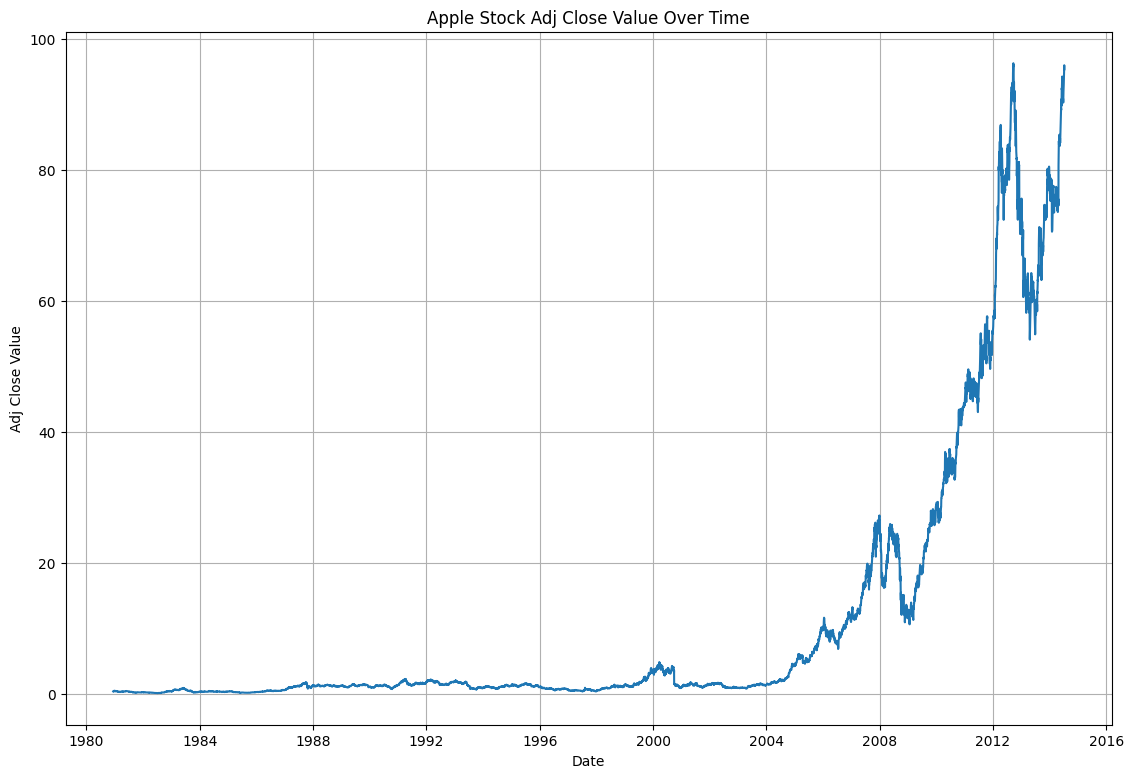

In [80]:
plt.figure(figsize=(13.5, 9))
plt.plot(apple['Date'], apple['Adj Close'])
plt.title('Apple Stock Adj Close Value Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Value')
plt.grid(True)
plt.show()